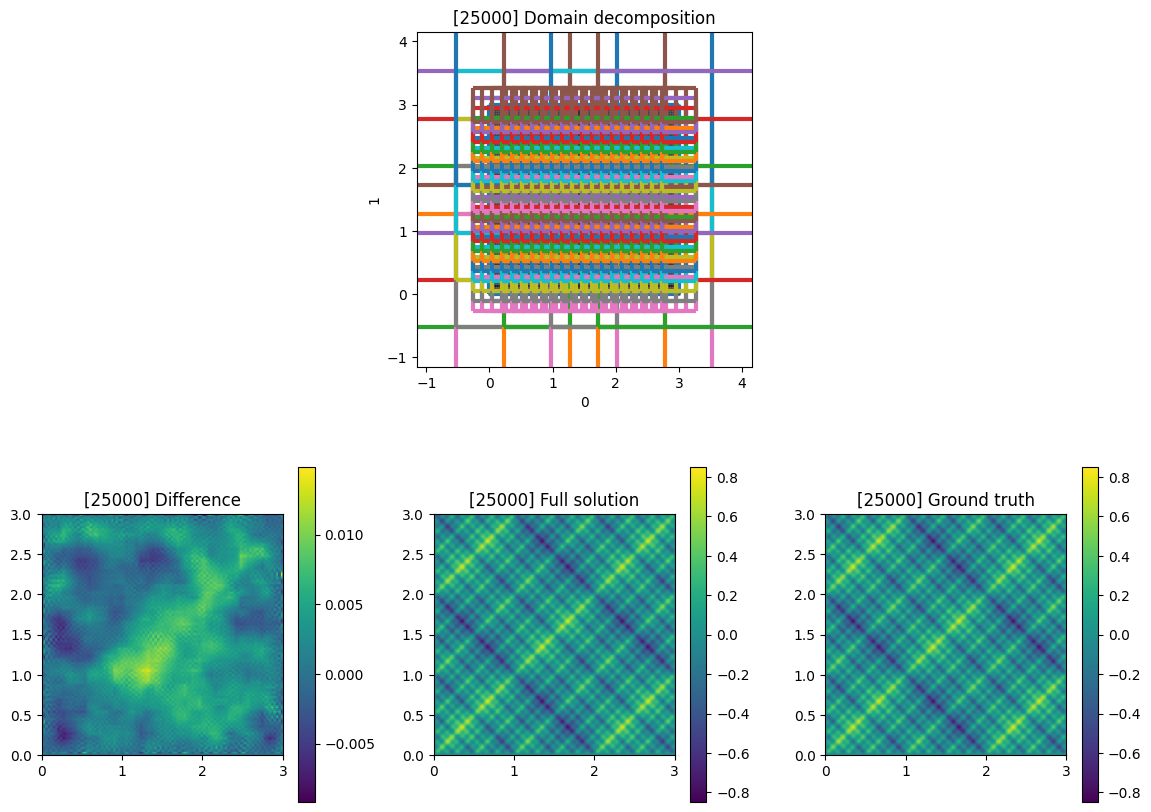

[INFO] 2024-12-05 05:53:17 - [i: 26000/100000] loss: 0.0706 rate: 101.0 elapsed: 0.06 hr test
[INFO] 2024-12-05 05:53:24 - [i: 27000/100000] loss: 0.0767 rate: 154.2 elapsed: 0.06 hr test
[INFO] 2024-12-05 05:53:31 - [i: 28000/100000] loss: 0.0645 rate: 159.1 elapsed: 0.06 hr test
[INFO] 2024-12-05 05:53:37 - [i: 29000/100000] loss: 0.1930 rate: 166.3 elapsed: 0.06 hr test


KeyboardInterrupt: 

In [ ]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import Laplace2D
from fbpinns.decompositions import MultilevelRectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

XMIN, XMAX, YMIN, YMAX = 0, 3, 0, 3

w = 3.4
subdomain_xss = [[np.array([1.5]),np.array([1.5])]] +\
    [[np.linspace(0,3,n_),np.linspace(0,3,n_)] for n_ in (5,)] +\
    [[np.linspace(0,3,n_),np.linspace(0,3,n_)] for n_ in (20,)]
subdomain_wss = [[np.array([3.]),np.array([3.])]] +\
    [get_subdomain_ws(subdomain_xss[1], w)] +\
    [get_subdomain_ws(subdomain_xss[2], w)]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([3.,3.])
        ),
    problem=Laplace2D,
    problem_init_kwargs = dict(n=5, sd=0.1),
    decomposition=MultilevelRectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xss=subdomain_xss,
        subdomain_wss=subdomain_wss,
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 32, 1),
    ),
    optimiser_kwargs=dict(learning_rate=1e-3),
    scheduler = AllActiveSchedulerND,
    ns=((100,100),),
    n_test=(160,160),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()